In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [169]:
data = pd.read_csv(r"C:\Users\97798\Desktop\ML\Week 10\bank_data.csv", sep = ',')

In [170]:
data

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30355,41180,36,admin,married,university.degree,no,no,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30356,41181,37,admin,married,university.degree,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30357,41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30358,41185,56,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [58]:
data.drop(['Unnamed: 0'],axis =1, inplace = True)

In [6]:
X = data.drop(['y'], axis =1)

In [7]:
y = data.y


In [8]:
num_features = data.select_dtypes(exclude='object')

In [9]:
cat_features = data.select_dtypes(include='object')

In [10]:
num_features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
30355,36,254,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
30356,37,281,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
30357,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
30358,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [11]:
cat_features

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
30355,admin,married,university.degree,no,no,no,cellular,nov,fri,nonexistent,no
30356,admin,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes
30357,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
30358,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no


In [12]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((24288, 20), (6072, 20))

In [13]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(num_features)

VarianceThreshold(threshold=0)

In [15]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(num_features)

VarianceThreshold(threshold=0)

In [16]:
var_thres.get_support()


array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True])

In [17]:
constant_columns = [column for column in num_features.columns
                    if column not in num_features.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [18]:
for column in constant_columns:
    print(column)

pdays
previous


In [20]:
X_test.drop(['pdays','previous'], axis =1, inplace = True)

In [22]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
8771,28,admin,single,university.degree,no,no,no,telephone,jun,wed,203,3,nonexistent,1.4,94.465,-41.8,4.959,5228.1
16500,46,blue-collar,married,basic.4y,no,yes,no,cellular,aug,wed,269,3,nonexistent,1.4,93.444,-36.1,4.967,5228.1
3673,27,student,single,university.degree,no,yes,no,telephone,may,mon,104,1,nonexistent,1.1,93.994,-36.4,4.858,5191.0
4391,31,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,wed,67,5,nonexistent,1.1,93.994,-36.4,4.858,5191.0
26791,26,student,single,high.school,no,no,no,telephone,may,wed,29,4,nonexistent,-1.8,92.893,-46.2,1.281,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15798,40,technician,married,university.degree,no,no,no,cellular,jul,thu,122,1,nonexistent,1.4,93.918,-42.7,4.968,5228.1
18998,53,services,married,high.school,no,no,no,cellular,aug,thu,62,2,nonexistent,1.4,93.444,-36.1,4.963,5228.1
19057,50,admin,married,basic.9y,unknown,yes,no,cellular,aug,thu,122,3,nonexistent,1.4,93.444,-36.1,4.963,5228.1
12446,36,technician,divorced,professional.course,no,yes,no,cellular,jul,mon,643,2,nonexistent,1.4,93.918,-42.7,4.962,5228.1


In [23]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(num_features, 0.8)
len(set(corr_features))

2

In [27]:
X_test.drop(['euribor3m','nr.employed'], axis =1 ,inplace = True)

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler()
                                            , num_features.columns)
    ],
    remainder='passthrough'
)



def evaluate_classification_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),
# 
        
        ('model', model),
    ])
    
    
    pipe.fit(X_train, y_train)  # Train the model with resampled data
    y_pred = pipe.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check the unique labels in the target variable and set pos_label accordingly
    unique_labels = np.unique(y_test)
    if len(unique_labels) == 2:
        pos_label = unique_labels[1]  # Assuming '1' is the positive label
    else:
        pos_label = None
    
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    
    return accuracy, precision, recall, f1

# Split the dataset into train and test sets

# Initialize different models
classification_models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Naive Bayes (GaussianNB)': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    
}


results = []

for model_name, model in classification_models.items():
    accuracy, precision, recall, f1 = evaluate_classification_model(model, X_train, y_train, X_test, y_test)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

                          Model  Accuracy  Precision    Recall  F1 Score
0           Logistic Regression  0.944664   0.545455  0.206897  0.300000
1      Random Forest Classifier  0.947299   0.587500  0.270115  0.370079
2  Gradient Boosting Classifier  0.949440   0.613260  0.318966  0.419660
3           AdaBoost Classifier  0.944664   0.534091  0.270115  0.358779
4            Bagging Classifier  0.943841   0.515419  0.336207  0.406957
5        Extra Trees Classifier  0.944170   0.524590  0.275862  0.361582
6     Support Vector Classifier  0.942688   0.000000  0.000000  0.000000
7     K-Nearest Neighbors (KNN)  0.943511   0.513661  0.270115  0.354049
8      Naive Bayes (GaussianNB)  0.918972   0.364662  0.557471  0.440909
9      Decision Tree Classifier  0.932148   0.412088  0.431034  0.421348


Upsampling the data

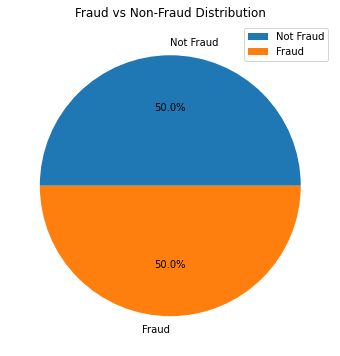

In [171]:
from sklearn.utils import resample


not_fraud = data[data.y == 'no']
fraud = data[data.y == 'yes']

# Upsample the fraud class
fraud_data_upsampled = resample(
    fraud,
    replace=True,
    n_samples=len(not_fraud),
    random_state=27
)

# Concatenate the upsampled fraud data with the original non-fraud data
upsampled = pd.concat([not_fraud, fraud_data_upsampled])

# Visualize the class distribution with a pie chart
plt.figure(figsize=(6, 6))
plt.pie(upsampled.y.value_counts(), autopct='%1.1f%%', labels=['Not Fraud', 'Fraud'])
plt.legend()
plt.title('Fraud vs Non-Fraud Distribution')
plt.show()

In [173]:
upsampled.drop(['Unnamed: 0'], axis=1, inplace = True)

In [174]:
X = upsampled.drop(['y'], axis =1)

In [175]:
y = upsampled.y

In [176]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((40187, 20), (17223, 20))

In [177]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
5042,31,admin,single,basic.9y,no,yes,no,telephone,may,mon,87,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
29560,38,admin,married,university.degree,no,no,no,telephone,nov,thu,411,4,999,0,nonexistent,-3.4,92.649,-30.1,0.714,5017.5
24613,65,retired,married,basic.4y,no,yes,no,cellular,apr,tue,106,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
5341,24,services,single,high.school,no,no,no,telephone,may,tue,185,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
23375,28,blue-collar,single,high.school,no,yes,no,cellular,apr,thu,329,2,999,0,nonexistent,-1.8,93.075,-47.1,1.483,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28893,28,services,single,university.degree,no,yes,no,cellular,jul,mon,316,4,999,0,nonexistent,-2.9,92.469,-33.6,1.048,5076.2
7698,52,blue-collar,married,basic.9y,no,yes,no,telephone,jun,thu,112,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1
23126,48,admin,married,basic.6y,no,yes,no,telephone,mar,mon,382,2,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1
29910,21,student,single,high.school,no,yes,no,cellular,jun,mon,270,1,999,0,nonexistent,-1.7,94.055,-39.8,0.720,4991.6


{'threshold': 0}

In [195]:
upsampled.drop(constant_columns, axis =1, inplace = True)

In [196]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler(), num_features.columns)
    ],
    remainder='passthrough'
)



def evaluate_classification_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),
# 
        
        ('model', model),
    ])
    
    
    pipe.fit(X_train, y_train)  # Train the model with resampled data
    y_pred = pipe.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check the unique labels in the target variable and set pos_label accordingly
    unique_labels = np.unique(y_test)
    if len(unique_labels) == 2:
        pos_label = unique_labels[1]  # Assuming '1' is the positive label
    else:
        pos_label = None
    
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    
    return accuracy, precision, recall, f1

# Split the dataset into train and test sets

# Initialize different models
classification_models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Naive Bayes (GaussianNB)': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    
}


results = []

for model_name, model in classification_models.items():
    accuracy, precision, recall, f1 = evaluate_classification_model(model, X_train, y_train, X_test, y_test)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

                          Model  Accuracy  Precision    Recall  F1 Score
0           Logistic Regression  0.880160   0.863496  0.903891  0.883232
1      Random Forest Classifier  0.985020   0.970992  1.000000  0.985282
2  Gradient Boosting Classifier  0.892876   0.864363  0.932723  0.897243
3           AdaBoost Classifier  0.877315   0.878496  0.876563  0.877529
4            Bagging Classifier  0.982756   0.966752  1.000000  0.983095
5        Extra Trees Classifier  0.989665   0.979805  1.000000  0.989799
6     Support Vector Classifier  0.928526   0.892089  0.975452  0.931910
7     K-Nearest Neighbors (KNN)  0.949486   0.909254  0.998958  0.951997
8      Naive Bayes (GaussianNB)  0.799803   0.800928  0.799444  0.800185
9      Decision Tree Classifier  0.978227   0.958384  1.000000  0.978750


In [240]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', MinMaxScaler(feature_range=(0,1)), num_features.columns)
    ],
    remainder='passthrough'
)



def evaluate_classification_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),
# 
        
        ('model', model),
    ])
    
    
    pipe.fit(X_train, y_train)  # Train the model with resampled data
    y_pred = pipe.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check the unique labels in the target variable and set pos_label accordingly
    unique_labels = np.unique(y_test)
    if len(unique_labels) == 2:
        pos_label = unique_labels[1]  # Assuming '1' is the positive label
    else:
        pos_label = None
    
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    
    return accuracy, precision, recall, f1

# Split the dataset into train and test sets

# Initialize different models
classification_models = {
    
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(weights='uniform',
    p=1,
    n_neighbors =3,
    algorithm='auto'),
    
    
}


results = []

for model_name, model in classification_models.items():
    accuracy, precision, recall, f1 = evaluate_classification_model(model, X_train, y_train, X_test, y_test)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                       Model  Accuracy  Precision  Recall  F1 Score
0  K-Nearest Neighbors (KNN)  0.962957   0.931206     1.0  0.964377


C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


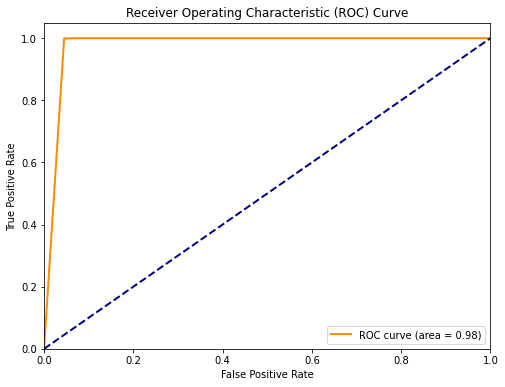

In [231]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), cat_features.columns),
        ('num_tnf', StandardScaler(), num_features.columns)
    ],
    remainder='passthrough'
)

# Define your model
model = KNeighborsClassifier(
    weights='uniform',
    p=1,
    n_neighbors =3,
    algorithm='auto'
   
)

# Create a pipeline
pipe = Pipeline([
    ('Transform', step1),
    ('model', model),
])

# Fit the pipeline
pipe.fit(X_train, y_train)

unique_labels = np.unique(y)
if len(unique_labels) == 2:
    pos_label = unique_labels[1]  # Assuming '1' is the positive label
else:
    pos_label = None  # If it's not binary, you can set it to None or specify the positive class label

# Predict probabilities for the positive class (class 1)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=pos_label)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


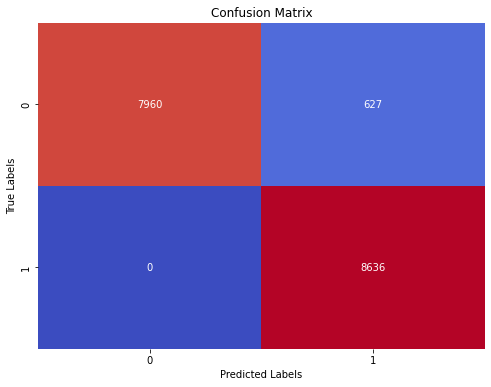

In [232]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), cat_features.columns),
        ('num_tnf', StandardScaler(), num_features.columns)
    ],
    remainder='passthrough'
)

# Define your model
model = KNeighborsClassifier(
    weights='uniform',
    p=1,
    n_neighbors =3,
    algorithm='auto'
   
)

# Create a pipeline
pipe = Pipeline([
    ('Transform', step1),
    ('model', model),
])


# Fit the pipeline
pipe.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipe.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with cool colors
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [233]:
model = KNeighborsClassifier(
    weights='uniform',
    p=1,
    n_neighbors =3,
    algorithm='auto'
   
)

# Create a pipeline
pipe = Pipeline([
    ('Transform', step1),
    ('model', model),
])


In [234]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Assuming you have already defined your pipeline 'pipe' and X, y
kfold_validation=KFold(5)

# Perform k-fold cross-validation (e.g., 5-fold)
k = 5 # You can adjust the number of folds as needed
accuracy_scores = cross_val_score(pipe, X, y, cv=k, scoring='accuracy')

# Print the accuracy scores for each fold and the mean accuracy
print("Accuracy Scores for Each Fold:")
for i, accuracy in enumerate(accuracy_scores):
    print(f"Fold {i + 1}: {accuracy:.4f}")
    
mean_accuracy = accuracy_scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.3f}")


C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

Accuracy Scores for Each Fold:
Fold 1: 0.9651
Fold 2: 0.7965
Fold 3: 0.9448
Fold 4: 0.7500
Fold 5: 0.5369
Mean Accuracy: 0.799


In [230]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define the parameter grid for RandomizedSearchCV for KNN
param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 9, 11],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a ColumnTransformer
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), cat_features.columns),
        ('num_tnf', StandardScaler(), num_features.columns)
    ],
    remainder='passthrough'
)

# Create a K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier()

# Create a Pipeline that includes the ColumnTransformer and KNN
pipe = Pipeline([
    ('Transform', step1),
    ('model', knn_model)
])

# Create a RandomizedSearchCV object for the pipeline
random_search_knn = RandomizedSearchCV(pipe, param_distributions=param_grid_knn, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV to your data
random_search_knn.fit(X_train, y_train)

# Get the best parameters and best estimator for KNN
best_params_knn = random_search_knn.best_params_
best_estimator_knn = random_search_knn.best_estimator_

# Print the best parameters and estimator for KNN
print("Best Parameters for KNN:", best_params_knn)
print("Best Estimator for KNN:", best_estimator_knn)


Best Parameters for KNN: {'model__weights': 'uniform', 'model__p': 1, 'model__n_neighbors': 3, 'model__algorithm': 'auto'}
Best Estimator for KNN: Pipeline(steps=[('Transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                 ('num_tnf', StandardScaler(),
                                                  Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx'],
      dtype='object'))])),
      

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [236]:
pipe


Pipeline(steps=[('Transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                 ('num_tnf', StandardScaler(),
                                                  Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx'],
      dtype='object'))])),
                ('model', KNeighborsClassifier(n_neighbors=3, p=1))])

In [238]:
import joblib

# Save the entire pipeline as a pickle file
joblib.dump(pipe, 'wwek_12.pkl')


['wwek_12.pkl']

In [242]:
y_test

5042      no
29560    yes
24613    yes
5341      no
23375    yes
        ... 
28893    yes
7698      no
23126    yes
29910    yes
30216    yes
Name: y, Length: 17223, dtype: object

In [246]:
y_pred

array(['no', 'yes', 'yes', ..., 'yes', 'yes', 'yes'], dtype=object)

In [247]:
diff = pd.DataFrame(
{
    'Actual':y_test,
    'Predicted':y_pred
})